In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp
import pandas as pd

### Linear Shooting Method

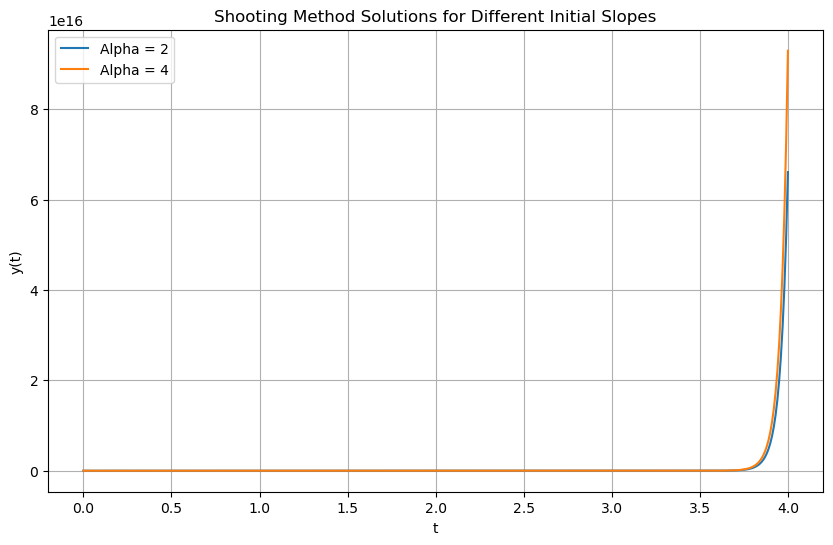

In [4]:
def f(t, y, z):
    return (2*t / 1+t**2)*z + (2/1+t**2)*y - 1

# Define the ODE system
def ode_system(t, y, alpha):
    dydt = y[1]
    dzdt = f(t, y[0], y[1])
    return np.array([dydt, dzdt])

# Runge-Kutta solver for IVP
def runga_kutta_solver(t0, t1, y0, alpha, h):
    n_steps = int((t1 - t0) / h)
    t = t0
    y = np.array([y0, alpha], dtype=float)
    
    for i in range(n_steps):
        k1 = h * ode_system(t, y, alpha)
        k2 = h * ode_system(t + h / 2, y + k1 / 2, alpha)
        k3 = h * ode_system(t + h / 2, y + k2 / 2, alpha)
        k4 = h * ode_system(t + h, y + k3, alpha)
        y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        t += h
        
    return y[1] 

# Shooting method to solve BVP for multiple slopes
def shooting_method_multiple_slopes(t0, t1, y0, y1, h, alpha_vals):
    results = {}  # Store results for each alpha value
    for alpha in alpha_vals:
        # Solve the IVP with the current alpha
        n_steps = int((t1 - t0) / h)
        t_values = np.linspace(t0, t1, n_steps + 1)
        y_values = []
        y = np.array([y0, alpha], dtype=float)
        
        for t in t_values:
            y_values.append(y[0])
            k1 = h * ode_system(t, y, alpha)
            k2 = h * ode_system(t + h / 2, y + k1 / 2, alpha)
            k3 = h * ode_system(t + h / 2, y + k2 / 2, alpha)
            k4 = h * ode_system(t + h, y + k3, alpha)
            y += (k1 + 2 * k2 + 2 * k3 + k4) / 6
        
        results[alpha] = np.array(y_values)  # Store the results for this alpha
    return t_values, results

# Example usage with multiple initial slopes
alpha_vals = [2, 4]
t0, t1 = 0, 4
y0, y1 = 3.0, -0.95
h = 0.01

# Get the time values and results for each slope
t_values, y_results = shooting_method_multiple_slopes(t0, t1, y0, y1, h, alpha_vals)

# Plotting the results
plt.figure(figsize=(10, 6))
for alpha in alpha_vals:
    plt.plot(t_values, y_results[alpha], label=f'Alpha = {alpha}')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Shooting Method Solutions for Different Initial Slopes')
plt.legend()
plt.grid(True)
plt.show()


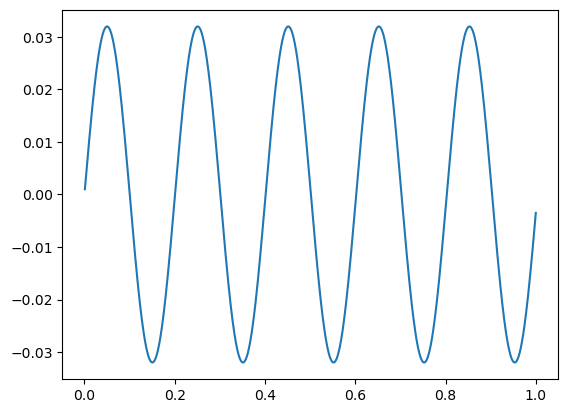

In [34]:
### Particle in box case Schrodinger equation 1D case
### width 0 to a and in this region, V = 0
h =  1.0   ## plank constant
m = 1.0  ## electron mass
a = 1.0   ## width
V = 0.0

## Boundary Condition
psi = 0
dpsi = 1.0  
x = 0
dx = a * 0.001

xlist = []
psilist = []

E = 4.9*10**2  ## Energy of electron

while x <= a:
    ddpsi = 2*m/h**2 * (V - E)*psi
    dpsi = dpsi + ddpsi * dx
    psi = psi + dpsi * dx
    x = x + dx
    xlist.append(x)
    psilist.append(psi)

plt.plot(xlist, psilist)

In [52]:
### Determining the eigen Value
eigenfunctions = []
eigenvalues = []
eigenfunctionsxlist = []
E = 0.0
dE = 0.01
dx = a * 0.001
a = 1.0
V = 0.0
count = 0
nmax= 3

while count <= nmax:
    psi = 1.0
    while abs(psi) > 0.001:
        psi = 0
        dpsi = 1
        x = 0
        E = E + dE
        xlist = []
        psilist = []
        
        while x <= a:
            ddpsi = 2*m / h**2 * (V-E)*psi
            dpsi = dpsi + ddpsi * dx
            psi = psi + dpsi * dx
            x = x + dx
            xlist.append(x)
            psilist.append(psi)
    eigenfunctions.append([psilist])
    eigenfunctionsxlist.append([xlist])
    eigenvalues.append(E)
    count += 1
    E = E * 1.1

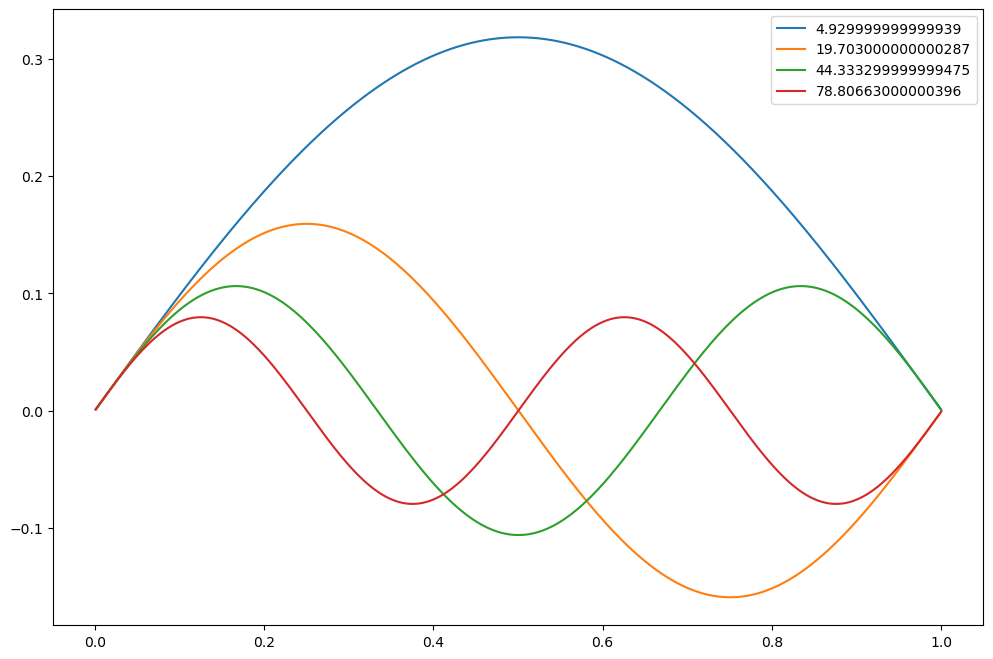

In [54]:
plt.figure(figsize= (12, 8))
plt.plot(eigenfunctionsxlist[0][0], eigenfunctions[0][0], label= eigenvalues[0])
plt.plot(eigenfunctionsxlist[1][0], eigenfunctions[1][0], label= eigenvalues[1])
plt.plot(eigenfunctionsxlist[2][0], eigenfunctions[2][0], label= eigenvalues[2])
plt.plot(eigenfunctionsxlist[3][0], eigenfunctions[3][0], label= eigenvalues[3])
plt.legend()


In [ ]:
for i in range(4):
    print(np.dot(eigenfunctions[i][0], eigenfunctions[i][0]) * dx)
    
## as expected inner product of psi is zero

0.050734735050646594
0.012700180955546071
0.005644286785617975
0.003175447979036373


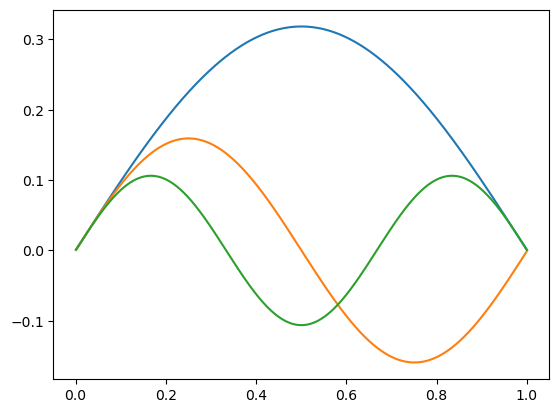

In [56]:
counter = 1
while counter <= nmax:
    plt.plot(xlist, eigenfunctions[counter - 1][0])
    counter += 1
    

### Quantum Harmonic Oscillator

<>:47: SyntaxWarning: invalid escape sequence '\p'
<>:47: SyntaxWarning: invalid escape sequence '\p'
C:\Users\disha\AppData\Local\Temp\ipykernel_9860\382545072.py:47: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("Energy and $\psi(x)$")


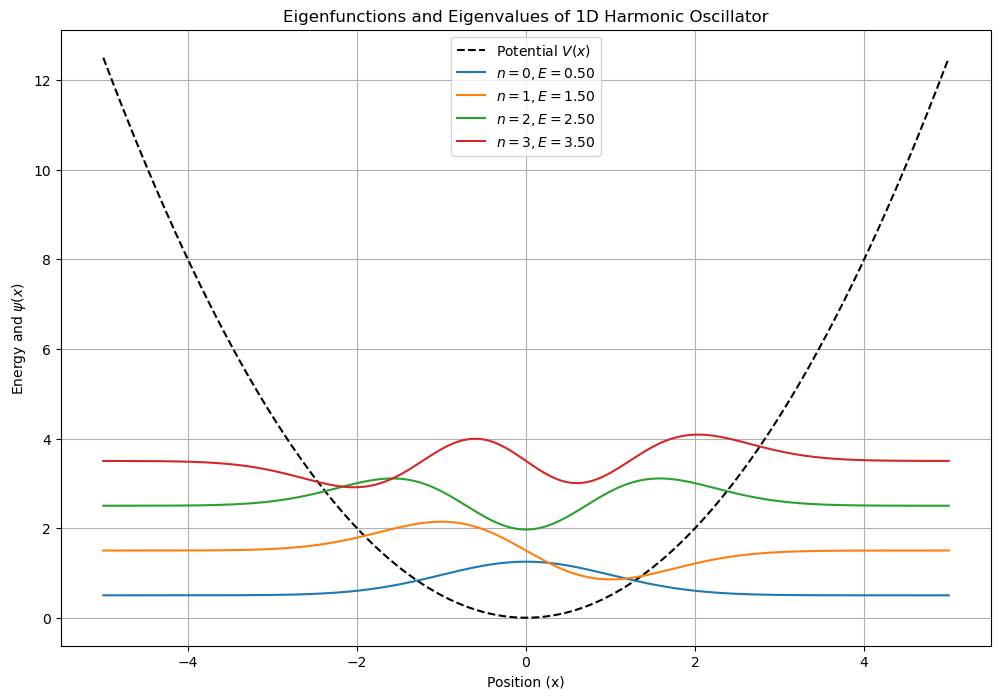

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Constants
hbar = 1.0  # Reduced Planck constant
m = 1.0     # Mass of particle
omega = 1.0 # Angular frequency
N = 500     # Number of discretization points
x_max = 5.0 # Maximum x value for the domain
x = np.linspace(-x_max, x_max, N)  # Discretized x values
dx = x[1] - x[0]  # Step size

# Potential: V(x) = 0.5 * m * omega^2 * x^2
V = 0.5 * m * omega**2 * x**2

# Construct the Hamiltonian matrix
H = np.zeros((N, N))
for i in range(N):
    if i > 0:
        H[i, i-1] = -hbar**2 / (2 * m * dx**2)  # Kinetic term (off-diagonal)
    H[i, i] = hbar**2 / (m * dx**2) + V[i]     # Kinetic + potential (diagonal)
    if i < N - 1:
        H[i, i+1] = -hbar**2 / (2 * m * dx**2)  # Kinetic term (off-diagonal)

# Solve the eigenvalue problem
eigenvalues, eigenfunctions = eigh(H)

# Extract the first few eigenvalues and eigenfunctions
num_states = 4  # Number of states to plot
eigenvalues = eigenvalues[:num_states]
eigenfunctions = eigenfunctions[:, :num_states]

# Normalize eigenfunctions
for n in range(num_states):
    eigenfunctions[:, n] /= np.sqrt(np.sum(eigenfunctions[:, n]**2) * dx)

# Plot the potential and eigenfunctions
plt.figure(figsize=(12, 8))
plt.plot(x, V, label="Potential $V(x)$", color="black", linestyle="--")

for n in range(num_states):
    plt.plot(x, eigenfunctions[:, n] + eigenvalues[n], label=f"$n={n}, E={eigenvalues[n]:.2f}$")

plt.title("Eigenfunctions and Eigenvalues of 1D Harmonic Oscillator")
plt.xlabel("Position (x)")
plt.ylabel("Energy and $\psi(x)$")
plt.legend()
plt.grid()
plt.show()
